In [1]:
import numpy as np
import pandas as pd

In [3]:
url = 'C:/Users/h199185/Downloads/MDS/05-Assignment/Assignment-Q/Data Set/nba_2013.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [5]:
df.shape

(481, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [8]:
df.isna().sum().sum()

94

In [10]:
df.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [11]:
df_nonna=df.dropna()

In [13]:
df_nonna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 480
Data columns (total 31 columns):
player          403 non-null object
pos             403 non-null object
age             403 non-null int64
bref_team_id    403 non-null object
g               403 non-null int64
gs              403 non-null int64
mp              403 non-null int64
fg              403 non-null int64
fga             403 non-null int64
fg.             403 non-null float64
x3p             403 non-null int64
x3pa            403 non-null int64
x3p.            403 non-null float64
x2p             403 non-null int64
x2pa            403 non-null int64
x2p.            403 non-null float64
efg.            403 non-null float64
ft              403 non-null int64
fta             403 non-null int64
ft.             403 non-null float64
orb             403 non-null int64
drb             403 non-null int64
trb             403 non-null int64
ast             403 non-null int64
stl             403 non-null int64
blk    

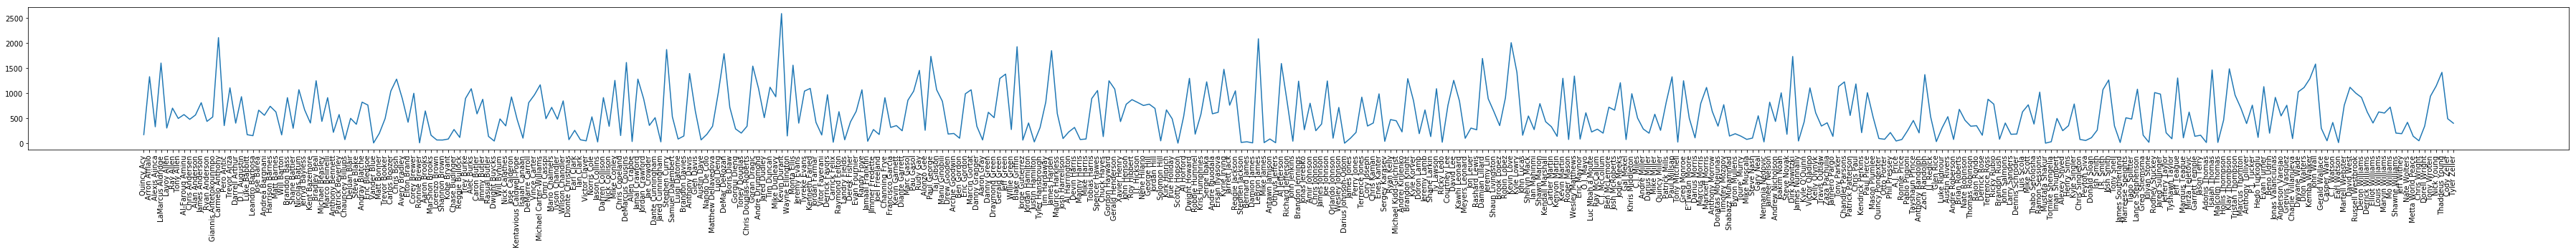

In [31]:
import matplotlib.pyplot as plt
x_axis = df_nonna['player']
y_axis = df_nonna['pts']
plt.figure(figsize=(50,5))
plt.plot(x_axis,y_axis )
plt.xticks(range(len(x_axis)), rotation=90)
plt.tight_layout()

In [30]:
df_nonna.sort_values(by='pts',ascending=False).head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
133,Kevin Durant,SF,25,OKC,81,81,3122,849,1688,0.503,...,540,598,445,103,59,285,174,2593,2013-2014,2013
17,Carmelo Anthony,PF,29,NYK,77,77,2982,743,1643,0.452,...,477,622,242,95,51,198,224,2112,2013-2014,2013
225,LeBron James,PF,29,MIA,77,77,2902,767,1353,0.567,...,452,533,488,121,26,270,126,2089,2013-2014,2013
277,Kevin Love,PF,25,MIN,77,77,2797,650,1421,0.457,...,739,963,341,59,35,196,136,2010,2013-2014,2013
179,Blake Griffin,PF,24,LAC,80,80,2863,718,1359,0.528,...,565,757,309,92,51,224,265,1930,2013-2014,2013


In [50]:
# select Player
import math
selected_player = df[df.player == 'Kevin Durant'].iloc[0]
distance_columns = list(df.columns.where(df.dtypes != object).dropna())
def euclidean_dist(r):
    inner_value = 0;
    for k in distance_columns:
        inner_value += (r[k] - selected_player[k]) ** 2
    return math.sqrt(inner_value)
Durant_dist = df.apply(euclidean_dist,axis=1)

In [47]:
selected_player['g']

81

In [65]:
num = df[distance_columns].drop(columns = 'season_end')
df_normalized = (num-num.mean())/num.std()

In [69]:
from scipy.spatial import distance
df_normalized.fillna(0,inplace=True)
Durant_normalized = df_normalized[df.player == 'Kevin Durant']
euclidean_distances = df_normalized.apply(lambda row: distance.euclidean(row, Durant_normalized), axis=1)
distance_frame = pd.DataFrame(data={"dist": euclidean_distances, "idx": euclidean_distances.index})
distance_frame.sort_values("dist", inplace=True)
second_smallest = distance_frame.iloc[1]["idx"]
most_similar_to_Durant = df.loc[int(second_smallest)]["player"]

In [101]:
import random
from numpy.random import permutation

# Randomly shuffle the index of nba.
random_indices = permutation(df.index)
df = df.fillna(0)
# Set a cutoff for how many items we want in the test set (in this case 1/3 of the items)
test_cutoff = math.floor(len(df)/3)

# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
test = df.loc[random_indices[1:test_cutoff]]

# Generate the train set with the rest of the data.
train = df.loc[random_indices[test_cutoff:]]

In [105]:
# The columns that we will be making predictions with.
x_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']
# The column that we want to predict.
y_column = ["pts"]

from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=5)
# Fit the model on the training data.
knn.fit(train[x_columns], train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(test[x_columns])

In [106]:
print("predictions[:5]:\n", predictions[:5])

predictions[:5]:
 [[1154.6]
 [1027. ]
 [1084.8]
 [ 423.8]
 [ 251.8]]


In [107]:
# Get the actual values for the test set.
actual = test[y_column]

# Compute the mean squared error of our predictions.
mse = (((predictions - actual) ** 2).sum()) / len(predictions)

In [108]:
actual = test[y_column]
print("actual[:20]:\n", actual[:20])
print("mse:", mse)

actual[:20]:
       pts
20   1107
300   990
262  1090
464   404
235   250
278  1417
123  1791
206    47
143   164
264   761
389    29
299    73
356     4
148   425
269   302
219     0
412  1012
272  1695
97    911
472   139
mse: pts    9509.075472
dtype: float64
